# Nomes de bebês americanos de 1880 a 2010
--- 

A SSA (Social Security Administration, Administração de Securtidade Social) dos Estados Unidos disponibiliza dados sobre 
frequência de nomes de bebês desde 1880.

**Índice**

1.[Importações e Personalização](#importações-e-personalização)

### Importações e Personalização
---

In [72]:
# Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Personalização
%matplotlib inline
np.random.seed(123)
plt.rc("figure", figsize=(8, 6))
plt.rcParams["figure.dpi"] = 300
np.set_printoptions(precision=4)
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80

### Carregando os dados
---

In [73]:
# Reunir todos os dados em um único DataFrame e adcionando o campo "year"
pieces = []

for year in range(1880, 2011):
    path = f"babynames/yob{year}.txt"
    frame = pd.read_csv(path, names=["name", "sex", "births"])
    frame["year"] = year
    pieces.append(frame)
    
names = pd.concat(pieces, ignore_index=True)
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


### Número total de nascimento por sexo e ano
---

In [74]:
total_births = names.pivot_table("births", index="year", columns="sex", aggfunc="sum")
total_births

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445
...,...,...
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310


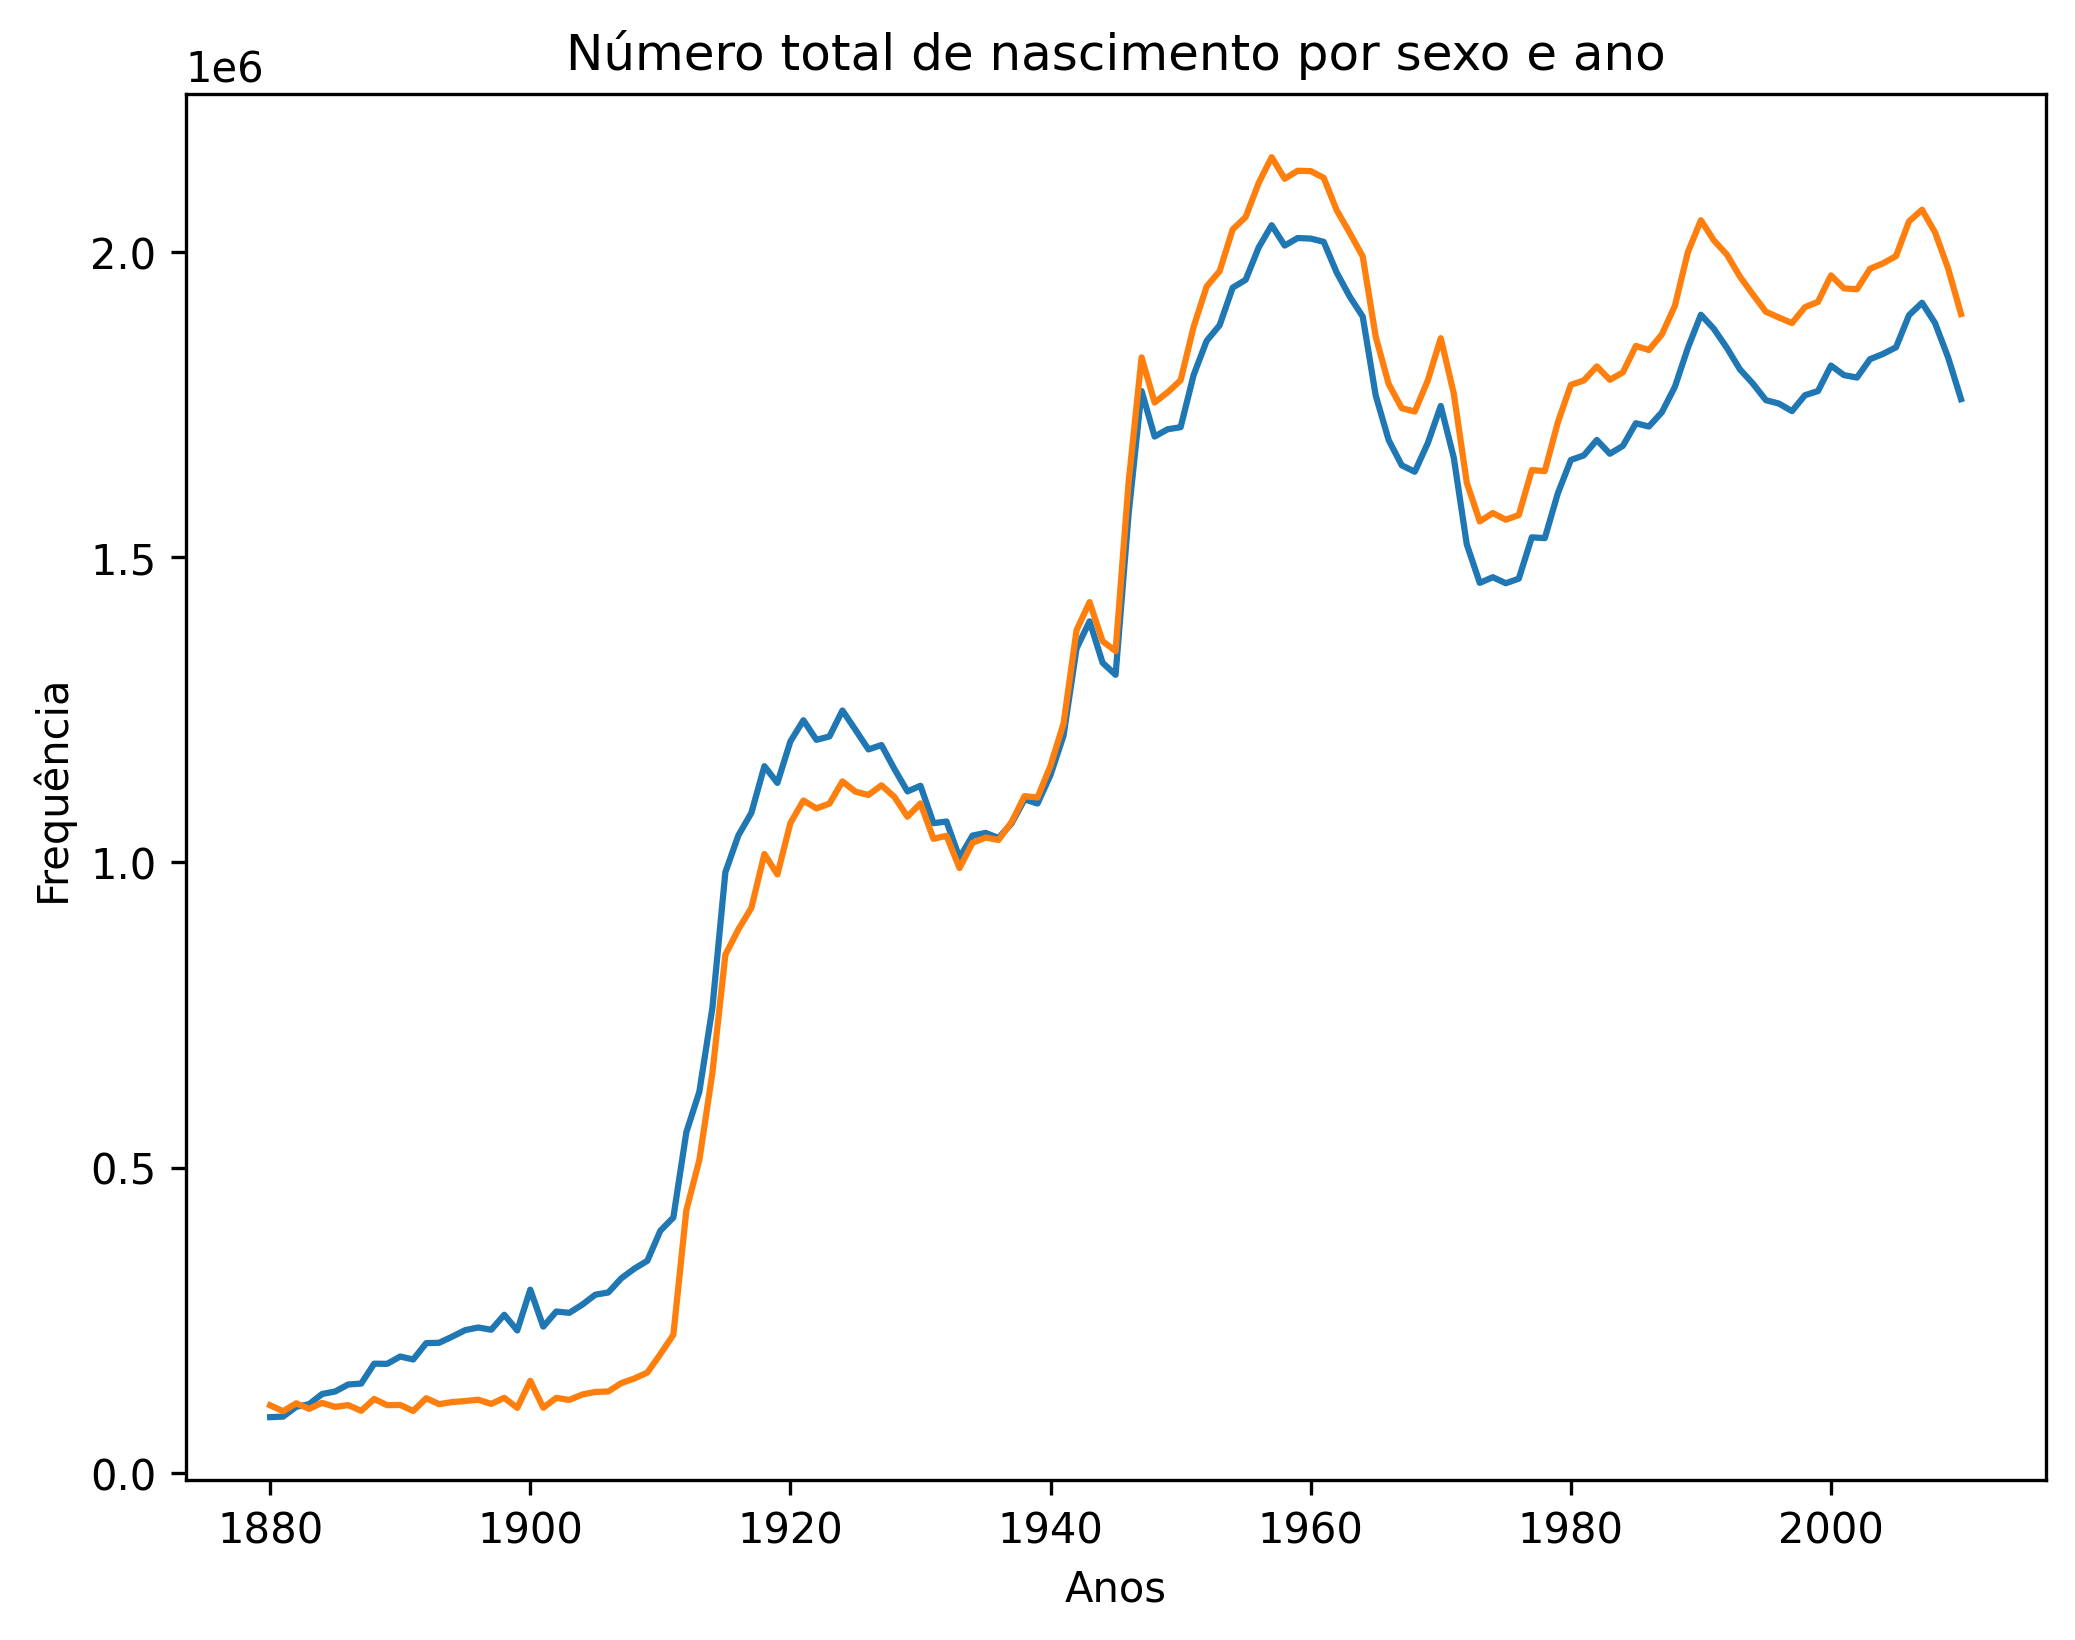

In [75]:
plt.plot(total_births)
plt.title("Número total de nascimento por sexo e ano")
plt.xlabel("Anos")
plt.ylabel("Frequência")
plt.show()

In [76]:
# Fração de bêbes que receberam cada nome em relação ao número total de nascimento
def add_prop(group):
    group["prop"] = group["births"] / group["births"].sum()
    return group

names = names.groupby(["year", "sex"]).apply(add_prop)
names

C:\Users\vitor\AppData\Local\Temp\ipykernel_15552\2612561869.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  names = names.groupby(["year", "sex"]).apply(add_prop)


name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077643
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
...                     ...  ..     ...   ...       ...
2010 M   1690779    Zymaire   M       5  2010  0.000003
         1690780     Zyonne   M       5  2010  0.000003
         1690781  Zyquarius   M       5  2010  0.000003
         1690782      Zyran   M       5  2010  0.000003
         1690783      Zzyzx   M       5  2010  0.000003

[1690784 rows x 5 columns]